# heart_disease bayesian_network stacking

Training on heart_disease dataset using bayesian_network model and stacking data

In [2]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Declaring real dataset and splitting into train/test

In [3]:
# Read hearts data
data_real = pd.read_csv("Data\hearts_data.csv")
data_real = data_real.dropna()
gen_method = "bayesian_network"
target = "target"

In [3]:
# Split hearts data into 80/20 train and test
data_train, data_test = train_test_split(data_real, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv("Data\hearts_train.csv", index=False)
data_test.to_csv("Data\hearts_test.csv", index=False)

In [4]:
data_train = Load("Data\hearts_train.csv")
data_test = Load("Data\hearts_test.csv")

# syn_v1

In [5]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v1.csv", key="synth")

[2024-05-07T18:23:59.770243+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train': Dataset({
    features: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target'],
    num_rows: 952
}), 'test': None, 'synth':       age  sex  chest pain type  resting bp s  cholesterol  \
0      58    1                4           134          233   
1      35    1                4            88          241   
2      43    1                4           150          257   
3      67    0                4            98          226   
4      57    0                3           119          215   
...   ...  ...              ...           ...          ...   
1185   53    1                2           142          225   
1186   43    1                4           118          244   
1187   36    1                2           134          245   
1188   56    1                4           138          318   
1189   71    1                3           112          300   

 

# syn_v2

In [6]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v1.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v1_test.csv", index=False)


In [7]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v2.csv", key="synth")

[2024-05-07T18:24:56.840222+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2121   63    1                4           189           10   
457    61    1                3           120            0   
1738   59    1                2           118          260   
883    44    1                2           120          263   
2279   58    1                4           121          251   
...   ...  ...              ...           ...          ...   
1638   65    1                4           141          358   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
1294   50    1                2           128          166   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2121                    1            0              99                0   
457                     0            0              80                1   
1738               

# syn_v3

In [8]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v2.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v2_test.csv", index=False)


In [9]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v3.csv", key="synth")

[2024-05-07T18:26:11.127532+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
624    59    1                4           110          239   
4522   63    1                4           118            0   
4227   61    0                1           122          232   
3135   54    1                3           143          306   
1554   48    1                4           129          271   
...   ...  ...              ...           ...          ...   
4426   59    0                3           122          282   
466    42    1                3           134          240   
3092   39    1                2           126          258   
3772   55    1                4           131          202   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
624                     0            2             142                1   
4522                    1            0             106                1   
4227               

# syn_v4

In [10]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v3.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v3_test.csv", index=False)

In [11]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v4.csv", key="synth")

[2024-05-07T18:26:12.976740+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2484   63    1                4           140          191   
3016   58    1                1           158            0   
5292   29    1                3           101          217   
7932   56    0                3           141          258   
4734   57    1                2           120          331   
...   ...  ...              ...           ...          ...   
5734   58    1                4           131          573   
5191   35    1                2           110          252   
5390   63    1                3             0            0   
860    62    0                4           140          268   
7270   77    1                4           117          277   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2484                    0            2             145                1   
3016                    1            0             153                1   
5292               

# syn_v5

In [12]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v4.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v4_test.csv", index=False)

In [13]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v5.csv", key="synth")

[2024-05-07T18:26:15.718879+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
2006    55    1                4           125          162   
1288    51    1                2           139          275   
18494   61    1                4           161          132   
15527   41    1                4           125            0   
12341   43    1                4           129          230   
...    ...  ...              ...           ...          ...   
11284   63    1                4           132            0   
11964   77    0                4           200           26   
5390    63    1                3             0            0   
860     62    0                4           140          268   
15795   57    1                4           113          161   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2006                     0            1             123                1   
1288                     0            0             157                1   
1849

# stack_v5 - Final stack

In [14]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v5.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v5_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [15]:
# Train stack_v5 and save as state
state_stack_v5 = Load(data_train).Train(plugin=gen_method)

[2024-05-07T18:26:23.509288+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


# stack_v5 (synth only)

In [16]:
# Remove first 1190 rows, equal to the real data, from stack_v5
data_stack_synth_only = data_stack.iloc[1190:,:]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\hearts_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [17]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(data_train).Train(plugin=gen_method)

[2024-05-07T18:26:35.664452+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


# Generate synth data based on stack_v5

In [18]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
22594   50    0                4           161          196   
1510    40    0                3           135          186   
26995   57    1                4           130          319   
14320   56    1                1           104          194   
34943   62    1                3           142            1   
...    ...  ...              ...           ...          ...   
16850   47    1                4           140          195   
6265    58    1                4           119          263   
11284   63    1                4           132            0   
860     62    0                4           140          268   
15795   57    1                4           113          161   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
22594                    0            0             150                0   
1510                     0            0             146                0   
2699

In [19]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [20]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
19876   31    1                3           102          323   
6191    54    1                4           144            0   
3687    38    1                4           107            0   
1440    65    0                4           135          185   
28826   66    1                4           128          130   
...    ...  ...              ...           ...          ...   
18040   68    0                4           100          177   
7455    29    1                2           134          222   
12474   53    1                4           119            0   
2050    73    1                1           122          293   
16985   54    1                4           132            2   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
19876                    0            1             123                0   
6191                     0            0             121                1   
3687

In [21]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [5]:
# Read train and test data (this is base/real train and test data, not the stack data)
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Count of data_real
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.009955,0.003088,0.990045,0.003088
1,pca_eigval_diff,u,0.087932,NaN,0.912068,NaN
2,pca_eigvec_ang,u,0.885263,NaN,0.718212,NaN
3,avg_cio,u,0.264686,0.162193,0.264686,0.162193
4,corr_mat_diff,u,1.064197,NaN,0.983876,NaN
5,mutual_inf_diff,u,0.555304,NaN,0.991586,NaN
6,ks_tvd_stat,u,0.036907,0.009028,0.963093,0.009028
7,frac_ks_sigs,u,0.166667,NaN,0.833333,NaN
8,avg_h_dist,u,0.009086,0.002962,0.990914,0.002962
9,avg_pMSE,u,0.003006,0.000322,0.987975,0.001290


# Eval on syn_2

In [6]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v2_sample.csv", index=False)

In [7]:
# Read syn_v2 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.020377,0.003096,0.979623,0.003096
1,pca_eigval_diff,u,0.079458,NaN,0.920542,NaN
2,pca_eigvec_ang,u,0.624161,NaN,0.801323,NaN
3,avg_cio,u,0.140732,0.140732,0.140732,0.140732
4,corr_mat_diff,u,1.120617,NaN,0.983021,NaN
5,mutual_inf_diff,u,0.587850,NaN,0.991093,NaN
6,ks_tvd_stat,u,0.064671,0.010799,0.935329,0.010799
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.020874,0.006882,0.979126,0.006882
9,avg_pMSE,u,0.010979,0.000115,0.956083,0.000460


# Eval on syn_3

In [8]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v3_sample.csv", index=False)

In [9]:
# Read syn_v3 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.024748,0.003147,0.975252,0.003147
1,pca_eigval_diff,u,0.087379,NaN,0.912621,NaN
2,pca_eigvec_ang,u,0.518958,NaN,0.834811,NaN
3,avg_cio,u,0.304317,0.194233,0.304317,0.194233
4,corr_mat_diff,u,1.185314,NaN,0.982041,NaN
5,mutual_inf_diff,u,0.604785,NaN,0.990837,NaN
6,ks_tvd_stat,u,0.068813,0.017629,0.931187,0.017629
7,frac_ks_sigs,u,0.583333,NaN,0.416667,NaN
8,avg_h_dist,u,0.015145,0.005953,0.984855,0.005953
9,avg_pMSE,u,0.015518,0.000643,0.937926,0.002571


# Eval on syn_4

In [10]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v4_sample.csv", index=False)

In [11]:
# Read syn_v4 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.033275,0.003110,0.966725,0.003110
1,pca_eigval_diff,u,0.115551,NaN,0.884449,NaN
2,pca_eigvec_ang,u,1.261466,NaN,0.598463,NaN
3,avg_cio,u,0.276323,0.172527,0.276323,0.172527
4,corr_mat_diff,u,1.312220,NaN,0.980118,NaN
5,mutual_inf_diff,u,0.633500,NaN,0.990402,NaN
6,ks_tvd_stat,u,0.078818,0.018083,0.921182,0.018083
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.019265,0.005933,0.980735,0.005933
9,avg_pMSE,u,0.023468,0.000877,0.906127,0.003507


# Eval on syn_5

In [12]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v5_sample.csv", index=False)

In [13]:
# Read syn_v5 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.031785,0.003157,0.968215,0.003157
1,pca_eigval_diff,u,0.107923,NaN,0.892077,NaN
2,pca_eigvec_ang,u,1.368916,NaN,0.564261,NaN
3,avg_cio,u,0.378753,0.232010,0.378753,0.232010
4,corr_mat_diff,u,1.351818,NaN,0.979518,NaN
5,mutual_inf_diff,u,0.643349,NaN,0.990252,NaN
6,ks_tvd_stat,u,0.073106,0.019196,0.926894,0.019196
7,frac_ks_sigs,u,0.500000,NaN,0.500000,NaN
8,avg_h_dist,u,0.013307,0.005096,0.986693,0.005096
9,avg_pMSE,u,0.021007,0.000469,0.915972,0.001877


# Eval on stack_v5 to real data

In [14]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_v5_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v5 = S.evaluate(data_syn,target,"full_eval")
res_stack_v5

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.039291,0.003139,0.960709,0.003139
1,pca_eigval_diff,u,0.114275,NaN,0.885725,NaN
2,pca_eigvec_ang,u,1.205644,NaN,0.616232,NaN
3,avg_cio,u,0.014343,0.014343,0.014343,0.014343
4,corr_mat_diff,u,1.400845,NaN,0.978775,NaN
5,mutual_inf_diff,u,0.649563,NaN,0.990158,NaN
6,ks_tvd_stat,u,0.077729,0.021721,0.922271,0.021721
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.067753,0.053389,0.932247,0.053389
9,avg_pMSE,u,0.025725,0.000904,0.897102,0.003614


# Eval on stack_synth_only to real data

In [15]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_synth_only_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.037090,0.003182,0.962910,0.003182
1,pca_eigval_diff,u,0.114587,NaN,0.885413,NaN
2,pca_eigvec_ang,u,1.282870,NaN,0.591650,NaN
3,avg_cio,u,0.126779,0.126779,0.126779,0.126779
4,corr_mat_diff,u,1.417326,NaN,0.978525,NaN
5,mutual_inf_diff,u,0.652356,NaN,0.990116,NaN
6,ks_tvd_stat,u,0.080430,0.020939,0.919570,0.020939
7,frac_ks_sigs,u,0.583333,NaN,0.416667,NaN
8,avg_h_dist,u,0.016582,0.006716,0.983418,0.006716
9,avg_pMSE,u,0.022631,0.000833,0.909477,0.003331


# Multiple plots for evaluation comparisons

In [16]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [17]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_v5, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_v5", "res_stack_synth_only"]

In [18]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate,mia_cls_risk
res_real,0.284664,0.492367,0.035714,0.996639
res_stack_v1,0.236345,0.469118,0.002101,0.998319
res_stack_v2,0.220588,0.451261,0.004202,0.998319
res_stack_v3,0.212185,0.428151,0.000000,0.996639
res_stack_v4,0.218487,0.426821,0.004202,0.994958
res_stack_v5,0.218487,0.427661,0.003151,0.998319
res_stack_synth_only,0.185924,0.408263,0.000000,0.996639


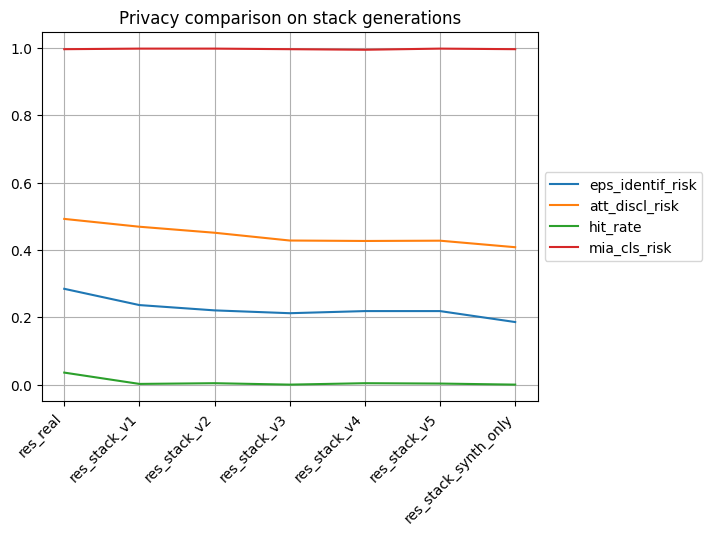

In [19]:
privacy_plot.plot.line()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [20]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

DCR_plot

,median_DCR
res_real,2.402737
res_stack_v1,2.535431
res_stack_v2,2.722098
res_stack_v3,3.127319
res_stack_v4,3.196044
res_stack_v5,3.093367
res_stack_synth_only,3.355546


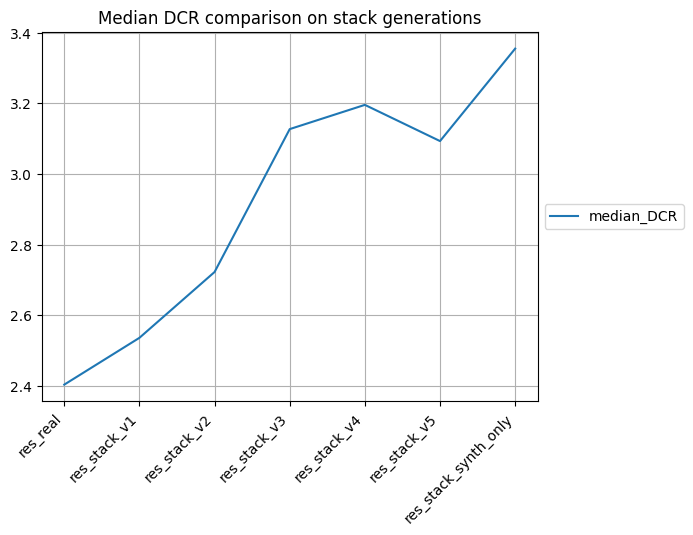

In [21]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [22]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.009955,0.087932,0.885263
res_stack_v1,0.020377,0.079458,0.624161
res_stack_v2,0.024748,0.087379,0.518958
res_stack_v3,0.033275,0.115551,1.261466
res_stack_v4,0.031785,0.107923,1.368916
res_stack_v5,0.039291,0.114275,1.205644
res_stack_synth_only,0.037090,0.114587,1.282870


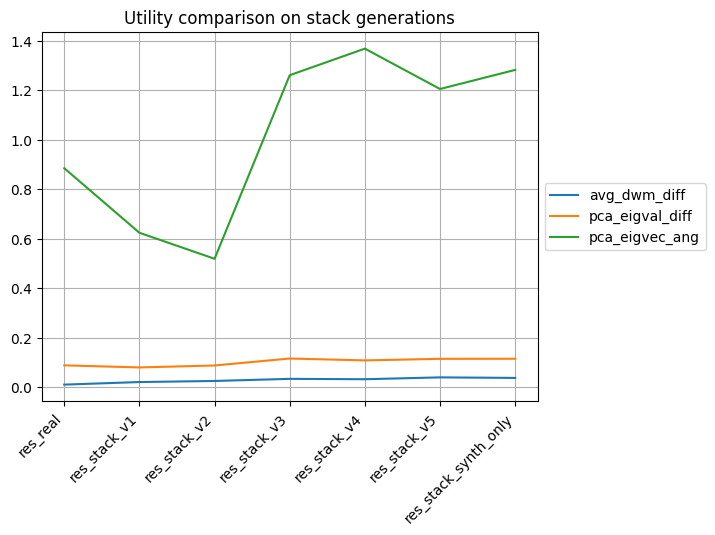

In [23]:
utility_plot.plot.line()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [24]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,1.064197,0.555304
res_stack_v1,1.120617,0.587850
res_stack_v2,1.185314,0.604785
res_stack_v3,1.312220,0.633500
res_stack_v4,1.351818,0.643349
res_stack_v5,1.400845,0.649563
res_stack_synth_only,1.417326,0.652356


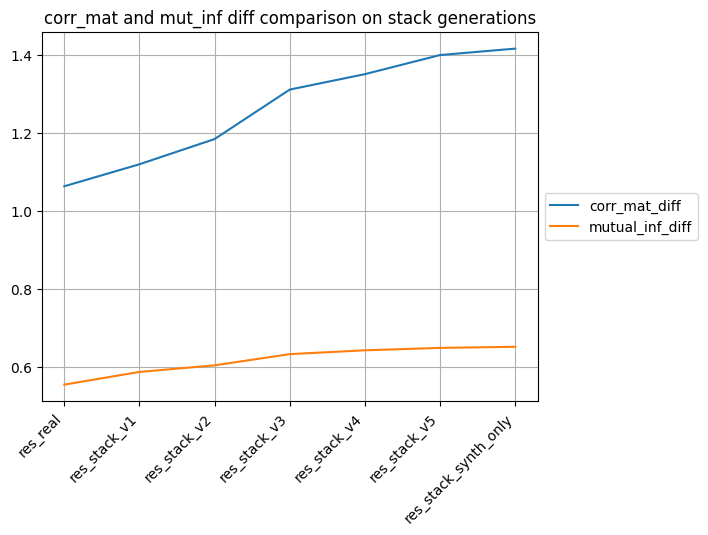

In [25]:
matrix_diff_plot.plot.line()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [26]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.009955,0.087932,0.885263,0.264686,1.064197,0.555304,0.036907,0.166667,0.009086,0.003006,...,0.038054,0.657353,0.080952,0.072508,0.060924,0.017121,0.035714,0.284664,0.996639,0.492367
res_stack_v1,0.020377,0.079458,0.624161,0.140732,1.120617,0.587850,0.064671,0.666667,0.020874,0.010979,...,-0.009241,0.721324,0.032108,0.107379,0.098739,0.017884,0.002101,0.236345,0.998319,0.469118
res_stack_v2,0.024748,0.087379,0.518958,0.304317,1.185314,0.604785,0.068813,0.583333,0.015145,0.015518,...,-0.018255,0.743487,0.014496,0.118152,0.136555,0.021865,0.004202,0.220588,0.998319,0.451261
res_stack_v3,0.033275,0.115551,1.261466,0.276323,1.312220,0.633500,0.078818,0.666667,0.019265,0.023468,...,0.014724,0.730462,0.050630,0.202202,0.163866,0.100164,0.000000,0.212185,0.996639,0.428151
res_stack_v4,0.031785,0.107923,1.368916,0.378753,1.351818,0.643349,0.073106,0.500000,0.013307,0.021007,...,-0.005967,0.724370,0.029972,0.212411,0.107143,0.092748,0.004202,0.218487,0.994958,0.426821
res_stack_v5,0.039291,0.114275,1.205644,0.014343,1.400845,0.649563,0.077729,0.666667,0.067753,0.025725,...,0.006166,0.728992,0.022409,0.178315,0.160714,0.139040,0.003151,0.218487,0.998319,0.427661
res_stack_synth_only,0.037090,0.114587,1.282870,0.126779,1.417326,0.652356,0.080430,0.583333,0.016582,0.022631,...,0.008488,0.753046,0.013620,0.335309,0.283613,0.328190,0.000000,0.185924,0.996639,0.408263


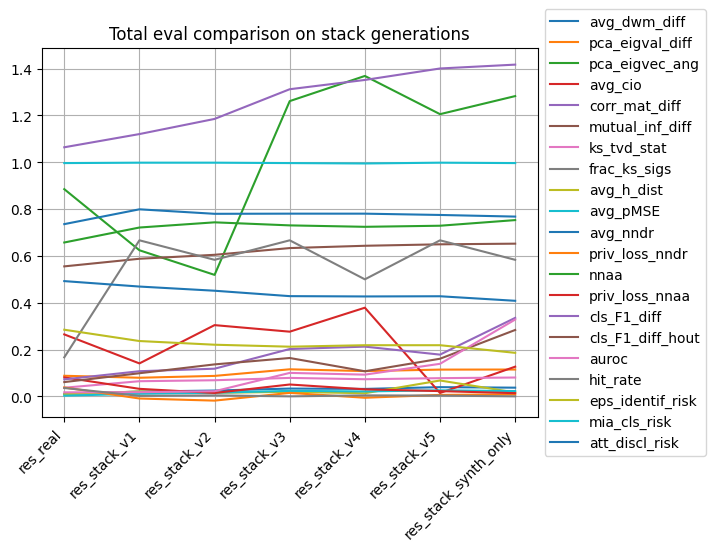

In [27]:
total_eval.plot.line()
plt.title("Total eval comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [28]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.844849,0.723900
1,res_stack_v1,0.791063,0.754925
2,res_stack_v2,0.803604,0.758024
3,res_stack_v3,0.760083,0.759302
4,res_stack_v4,0.783283,0.762099
5,res_stack_v5,0.737417,0.761836
6,res_stack_synth_only,0.718883,0.769083


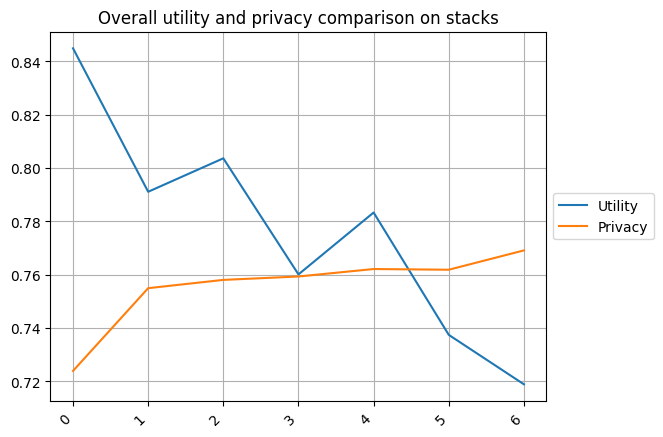

In [29]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()